# Função de transferência de sistemas contínuos

Renato Naville Watanabe

## Preparação do ambiente

In [ ]:
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.5 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import sympy as sym
%matplotlib widget

## Definição do problema

Aqui, vamos considerar o formato geral de uma equação diferencial de um sistema linear e invariante no tempo:

$$\frac{d^Ny}{dt^N} + a_{N-1}\frac{d^{N-1}y}{dt^{N-1}}+...+a_0y(t) = b_M\frac{d^Mx}{dt^M} +...+b_2\frac{d^2x}{dt^2}+b_1\frac{dx}{dt} + b_0x(t) $$

Como já vimos anteriormente, a solução desta equação é formada por duas partes:

$$y(t) = y_{zi}(t) + y_{zs}(t)$$

em que $y_{zi}(t)$ é a parte de $y$ devida às condições iniciais do sinal de saída (os valores de $y(0), \frac{dy}{dt}(0), ..., \frac{d^{N-1}y}{dt^{N-1}}(0)$). Para o cálculo dessa componente, considera-se que a entrada $x(t)$ é nula ($zi$ é de *zero input*, **entrada nula** em inglês).

A outra componente, $y_{zs}(t)$, é devido à entrada $x(t)$. Para o cálculo dessa componente consideramos que os valores de $y(0), \frac{dy}{dt}(0), ..., \frac{d^{N-1}y}{dt^{N-1}}(0)$ são todos iguais a 0 ($zs$ é de *zero state*, **estado nulo** em inglês, às vezes também chamado de **repouso**).

Vamos agora encontrar essas duas partes da solução utilizando transformada de Laplace. É consideravelmente mais simples do que o método clássico.

## Resposta de estado nulo



Como já vimos anteriormente, a transformada de Laplace de $\frac{d^mx}{dt^m}$ é:

$\mathcal{L}\left(\frac{d^mx}{dt^m}\right) = s^{m}X(s)$

e a transformada de Laplace de $\frac{d^my}{dt^m}$ é:

$\mathcal{L}\left(\frac{d^my}{dt^m}\right) = s^{m}y(s)$

Substituindo essas transformadas dos sinais atrasado na equação de diferenças, temos:

$$s^NY(s) + a_{N-1}s^{N-1}Y(z)+...+a_0Y(z) = b_Ms^{M}X(s) +...+b_2s^2X(s)+b_1sX(s) + b_0X(s)$$

Com isso, podemos definir a função $H(s)$:

$H(s) = \frac{Y(s)}{X(s)} = \frac{b_Ms^M +...+b_2s^2+b_1s + b_0}{s^N + a_{N-1}s^{N-1}+...+a_0}$

Essa função é conhecida como **função de transferência** do sistema. Ela é obtida diretamente dos coeficientes da equação diferencial.

---

### Exemplo 1

Vamos considerar o sistema com a seguinte equação de diferenças:

$\frac{d^2y}{dt^2} + 3\frac{dy}{dt} - 4y(t) = 3x(t) + \frac{dx}{dt}$

A função de transferência deste sistema é:

$H(s) = \frac{s+3}{s^2 + 3s-4}$

---

---

### Exemplo 2

Vamos considerar o sistema com a seguinte equação diferencial:

$\frac{dy}{dt}  = -0.5y(t) + x(t)$

A função de transferência deste sistema é:

$H(s) = \frac{1}{s + 0.5}$

---

Observando a expressão da função de transferência, vemos que se $X(s) = 1$, $Y(s) = H(s)$. O sinal $x(t)$ que tem uma transformada de Laplace igual a 1 é o impulso de Dirac ($x(t)=\delta(t)$). Portanto a função de transferência é a transformada de Laplace da resposta ao impulso.

$H(s) = \int_{0^-}^\infty h(t)e^{-st}\,dt$

---

### Exemplo 3

A resposta ao impulso do sistema do exemplo 2 é:

$h(t) = e^{-0.5t}u(t)$

A transformada de Laplace dessa resposta ao impulso é:

$H(s) = \int_{0}^\infty  e^{-0.5t}u(t) e^{-st}\,dt= \int_{0}^\infty  e^{-(0.5+s)t} \,dt = \left.\frac{e^{-(0.5+s)t}}{-(0.5+s)}\right|_{t=0}^\infty = \frac{1}{s+0.5}$

Como esperado, a função encontrada foi a mesma do exemplo 2.

---

A partir da expressão da função de transferência, chegamos à expressão para $Y(s)$:

$H(s) = \frac{Y(s)}{X(s)} \rightarrow Y(s) = H(s)X(s)$

Também podemos chegar a essa expressão pela propriedade da convolução da transformada de Laplace:

$y(t) = h(t)*x(t) \rightarrow Y(s) = H(s)X(s)$

Tendo $Y(s)$, basta calcular a sua transformada inversa para encontrar $y(t)$.

---

### Exemplo 4

Vamos considerar o mesmo sistema do exemplo 2 e encontrar o sinal de saída quando a entrada é um degrau.

$x(t) = u(t)$

A sua transformada de Lapalace é:

$X(s) = \frac{1}{s}$

Então, a transformada de Laplace do sinal de saída é:

$Y(s) = H(s)X(s) = \frac{1}{s + 0.5}\frac{1}{s} = \frac{1}{s(s+0.5)} $

Expandindo $Y(s)$ em frações parciais:

$Y(s) = H(s)X(s) = \frac{1}{s(s+0.5)} = \frac{A_1}{s} + \frac{A_2}{s+0.5}$

Com

$A_1 = \left.\frac{1}{s+0.5}\right|_{s=0}=2$ e $A_2=\left.\frac{1}{s}\right|_{s=-0.5}=-2$

Então $Y(s)$ é:

$Y(s) = \frac{2}{s} - \frac{2}{s+0.5}$

Com a transformada de Laplace inversa de $Y(s)$, chegamos ao sinal de saída do sistema:

$y(t) = 2u(t) - 2e^{-0.5t}u(t) = 2(1-e^{-0.5t})u(t)$

Abaixo é mostrado o gráfico do sinal.

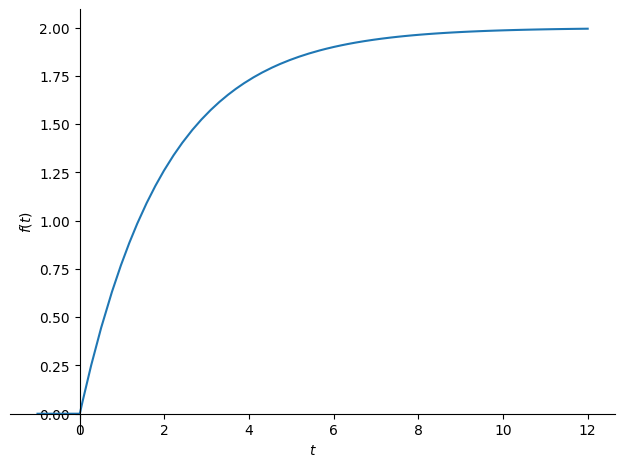

In [ ]:
t = sym.symbols('t')
y = 2*(1-sym.exp(-0.5*t))*sym.Heaviside(t)
sym.plot(y, (t, -1, 12));

---

## Resposta de entrada nula

Na resposta de entrada nula, considera-se que não existe entrada. Dessa maneira, a equação de diferenças fica:

$$\frac{d^Ny}{dt^N} + a_{N-1}\frac{d^{N-1}y}{dt^{N-1}}+...+a_0y(t) = 0 $$

Aqui, vamos considerar as condições iniciais. A transformada de Laplace de $\frac{d^My}{dt^M}$ quando existem condições iniciais no sinal $y(t)$ é:

$\mathcal{Z}(\frac{d^My}{dt^M}) = s^MX(s)-\displaystyle\sum_{k=2}^M s^{M-k}\frac{d^{k-1}x}{dt^{k-1}}(0) - s^{M-1}x(0)$

Fazendo essa substituição na equação diferencial, é possível obter a resposta de entrada nula.


---

### Exemplo 5

Vamos considerar o sistema do exemplo 1, com a seguinte equação de diferenças:

$\frac{d^2y}{dt^2} + 3\frac{dy}{dt} - 4y(t) = 3x(t) + \frac{dx}{dt}$

com $y(0) = 1$ e $\frac{dy}{dt}(0) = -1$ e um sinal de entrada $x(t) = \mathrm{sen}\left(2\pi 2t\right)u(t)$

Primeiro, vamos encontrar a resposta de entrada nula. Então, a transformada de Laplace da resposta de entrada nula:

$s^2Y_{zi}(s) -\frac{dy}{dt}(0) - sy(0) + 3sY_{zi}(z) -3y(0)  - 4Y_{zi}(z) = 0$

$Y_{zi}(z) = \frac{3y(0) + \frac{dy}{dt}(0)+sy(0)}{s^2 + 3s- 4} = \frac{s+2}{s^2 + 3s- 4}$

Agora, fazemos a expansão em frações parciais de $Y_{zi}(s)$:


$Y_{zi}(s) = \frac{s+2}{s^2 + 3s- 4} = \frac{s+2}{(s+4)(s-1)} = \frac{A_1}{s+4}+\frac{A_2}{s-1}$

$A_1 = \left.\frac{s+2}{(s-1)}\right|_{s=-4} = 0.4$ e $A_2 = \left.\frac{s+2}{s+4}\right|_{s=1} = 0.6$

Agora, conseguimos encontrar $y_{zi}(t)$:

$Y_{zi}(s) = \frac{0.4}{s+4}-\frac{0.6}{s-1} \rightarrow y_{zi}(t) = 0.4e^{-4t}u(t) -0.6e^tu(t)$



---

## Associações em série e  paralelo de sistemas

Uma outra maneira de representar um sistema no diagrama de blocos é colocando a sua função de transferência dentro do bloco

Abaixo, estão duas associações bem comuns de sistemas. Em paralelo e em série.

Em paralelo, a função de transferência do sistema resulatante é a soma das funções de transferência de cada subsistema.

<img src=https://github.com/GabrielSanchesOliveira/SistemasESinais/blob/master/Imagens/distributivaTF.png?raw=1 width="600">


Em série, a função de transferência do sistema resultante é a multiplicação das funções de transferência de cada subsistema.

<img src=https://github.com/GabrielSanchesOliveira/SistemasESinais/blob/master/Imagens/associativaTF.png?raw=1 width="500">

## Diagrama de blocos

Com o conceito de transformada de Laplace, podemos agora introduzir uma nova forma de representar um integrador no diagrama de blocos.

<img src=https://github.com/GabrielSanchesOliveira/SistemasESinais/blob/master/Imagens/integscont.png?raw=1 width="400">

Com a transformada de Laplace é muito mais fácil obter a equação diferencial a partir do diagrama de blocos. Basta substituir os sinais por suas transformadas e lembrar que a convolução no domínio do tempo é uma multiplicação no domínio da frequência.

---

### Exemplo 6

Considere o seguinte diagrama de blocos:

<img src=https://github.com/GabrielSanchesOliveira/SistemasESinais/blob/master/Imagens/diagexemploLaplace.png?raw=1 width="550">

Podemos chamar o resultado do somador à esquerda de $w(t)$. A sua transformada de Laplace é $W(s)$, que é igual a:

$W(s) = X(s) - 3\frac{1}{s}W(s)-5\frac{1}{s^2}W(s) \rightarrow W(s) = \frac{X(s)}{1+3\frac{1}{s}W(s)+5\frac{1}{s^2}} = \frac{X(s)s^2}{s^2+3s+5}$

E agora,  $Y(s)$ é:

$Y(s) = 2W(s) - 3\frac{1}{s}W(s) = \frac{(2s^2-3s)}{s^2+3s+5}X(s)$

Então:

$(s^2+3s+5)Y(s) = (2s^2-3s)X(s) \rightarrow \frac{d^2y}{dt^2}+3\frac{dy}{dt}5y(t) = 2\frac{d^2x}{dt^2}-3\frac{dx}{dt}$

Seria muito difícil obter a equação diferencial sem a transformada de Laplace.

---

Para obter o diagrama de blocos a partir da função de transferência, basta dividir a função de transferência como:

$H(s) = \frac{num(s)}{den(s)} = \frac{1}{den(s)}num(s)$



Isso é como se tivéssemos dois sistemas em série. O primeiro sistema não contém nenhuma derivada da entrada, então fazer o seu diagrama de blocos é trivial. O segundo sistema vai pegar a saída do primeiro sistema e suas derivadas.

<img src=https://github.com/GabrielSanchesOliveira/SistemasESinais/blob/master/Imagens/numdendiag.png?raw=1 width="600">

---

### Exemplo 7

Considere um sistema com a seguinte equação diferencial:

$$\frac{d^2y}{dt^2} = -3\frac{dy}{dt} + y + 2\frac{dx}{dt} + x(t)$$

A sua função de transferência é:

$H(s) = \frac{2s+1}{s^2+3s-1} = \frac{1}{s^2+3s-1}(2s+1)$

A equação diferencial do primeiro sistema é:

$$\frac{d^2y}{dt^2} = -3\frac{dy}{dt} + y + x(t)$$

Que tem o seguinte diagrama de blocos:


<img src=https://github.com/GabrielSanchesOliveira/SistemasESinais/blob/master/Imagens/exemploTFdiag.png?raw=1 width="400">


O segundo sistema tem a seguinte equação diferencial:

$y(t) = 2\frac{dx}{dt} + x(t)$


<img src=https://github.com/GabrielSanchesOliveira/SistemasESinais/blob/master/Imagens/exemploTFdiag2.png?raw=1 width="400">

---

É importante enfatizar que esse é apenas um diagrama de blocos possível para o sistema.

## Polos e zeros

O valor dos polos e zeros, juntamente com o valor da função de transferência em $H(0)$ também caracterizam completamente o sistema, já que é possível construir a função de transferência a partir dessas informações.

---

### Exemplo 8

Um sistema tem os polos em -2 e -4 e zeros em -1. Além disso, $H(0) = 3$.

Então, a sua função de transferência é:

$H(s) = \frac{G(s+1)}{(s+2)(s+4)} = \frac{G(s+1)}{s^2+6s+8}$

$H(0) = 3 = \frac{G}{8} \rightarrow G = 24$

Então:

$H(s) = \frac{24s+24}{s^2+6s+8}$

---

## Relação entre as diferentes representações de um sistema linear e invariante no tempo


Até agora vimos diversas  formas de representar o comportamento dinâmico de sistemas lineares e invariantes no tempo. Sempre conseguimos chegar de uma até outra


<img src=https://github.com/GabrielSanchesOliveira/SistemasESinais/blob/master/Imagens/relacoesH.png?raw=1 width="900">

## Regime permanente e transitório

É muio comum na prática da engenharia dividir o sinal de saída em duas partes:

- **transitório**: é a parte da saída que tende a zero com o passar do tempo, como uma exponencial com parte real negativa.


- **regime permanente**: é a parte da saída que permanece até o infinito.

---

### Exemplo 9

Um sistema tem a seguinte função de transferência:

$H(s) = \frac{1}{s+3}$

É colocada uma entrada cossenoidal com frequência 3 Hz e amplitude 1 a partir de $t=0$ s:

$x(t) = \cos(3 t)u(t)$

A transformada de Laplace desse sinal é:

$X(s) = \frac{s}{s^2+9}$


Então, a transformada de Laplace do sinal de saída é:

$Y(s) = \frac{1}{s+3}\frac{s}{s^2+9} = \frac{s}{(s+3j)(s-3j)(s+3)} = \frac{A_1}{s+3} + \frac{A_2}{s+3j}+\frac{A_3}{s-3j}$

$A_1 = \frac{-3}{(-3+3j)(-3-3j)} =-0.167 $

$A_2 = \frac{-3j}{(-3j+3)(-6j)} =0.11e^{j\frac{\pi}{4}} $

$A_3 = \frac{-3j}{(-3j+3)(-6j)} =0.11e^{-j\frac{\pi}{4}} $

Então:

$y(t) = -0.167e^{-3t}u(t) + 0.22\cos\left(3t-\frac{\pi}{4}\right)u(t) $



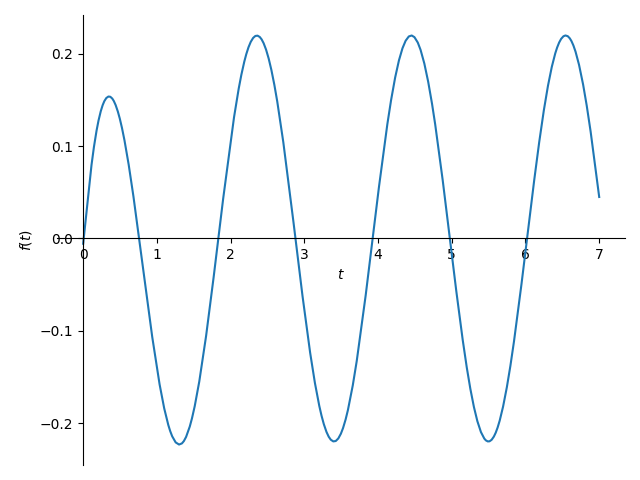

In [ ]:
t = sym.symbols('t')
y = (-0.167*sym.exp(-3*t)+0.22*sym.cos(3*t-sym.pi/4))*sym.Heaviside(t)
p1 = sym.plot(y, (t, 0, 7))
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.plot([1, 1], [-0.3, 0.3], color='dodgerblue', ls='--')
ax.text(3, 0.25, 'Regime permanente')
ax.text(0, 0.25, 'Transitório')
fig.canvas.draw_idle()

No gráfico acima do sinal de saída é possível ver que até aproximadamente 1 segundo o sinal de saída ainda não chegou no comportamento após 1 segundo. Até 1 segundo, aproximadamente, está o transitório. Depois que o transitório acaba, o sinal entra no regime permanente. O transitório é devido à exponencial e o regime permanente devido à senoide.

---

## Exercícios



**1)** Qual a equação diferencial dos sistemas com as seguintes respostas ao impulso:

a) $h_1(t) = e^{-4t}u(t) + te^{-t}u(t)$

b) $h_2(t) = e^{-3t}\cos(2\pi t)u(t)$

c) $h_3(t) = u(t)$

d) $h_4(t) = \delta(t) + e^{-2t}u(t)$

**2)** Quando um sistema tem um degrau na entrada, a sua saída é:

$y(t) = 10t^3e^{-2t}u(t)$

Qual a função de transferência e a resposta ao impulso deste sistema?

**3)** Encontre a solução de estado nulo para os sistemas descritos pelas seguintes equações diferenciais e entradas. Identifique a parte transitória e o regime permanente da saída.

a) $\frac{dy}{dt} = -6y(t) + x(t)$, com $x(t)=u(t)$

b) $\frac{dy}{dt} = 4y(t)  + x(t)$, com $x(t) = e^{-3t}u(t)$

c) $\frac{d^2y}{dt^2} = -\frac{dy}{dt} + \frac{dx}{dt} + x(t)$, com $x(t) = 25u(t)$

d) $\frac{d^2y}{dt^2} = -4y(t) + x(t)$, com $x(t) = \cos(2t)u(t)$

e) $\frac{d^2y}{dt^2} = -4\frac{dy}{dt}-13y(t) + 4\frac{dx}{dt} + 2x(t)$, com $x(t) = e^{-t}u(t)$

**4)** Um sistema linear e invariante no tempo tem a seguinte resposta ao impulso:

$h(t) = \delta(t) + 6e^{-t}u(t)-2e^{-3t}u(t)$

a) Quais são os polos e zeros deste sistema?

b) Qual a equação diferencial do sistema?

c) Qual a resposta para a entrada $x(t) = e^{-2t}u(t)-e^{-4t}u(t)$

**5)** Um sistema tem a seguinte equação diferencial:

$\frac{d^2y}{dt^2} = -4,5\frac{dy}{dt}-2y(t)+3\frac{dx}{dt}+3x(t)$

a) Quais os polos e zeros deste sistema?

b) Qual a resposta ao impulso deste sistema?

c) Qual a saída deste sistema para $x(t) = e^{-t}u(t)$

d) Qual a saída deste sistema para $x(t) = e^{-4t}u(t)$

e) Qual a saída deste sistema para $x(t) = e^{-8t}u(t)$



**6)** Um sistema tem a seguinte equação diferencial:

$\frac{d^2y}{dt^2} = -4y(t)+2\frac{dx}{dt}+4x(t)$

a) Quais os polos e zeros deste sistema?

b) Qual a resposta ao impulso deste sistema?

c) Qual a saída deste sistema para $x(t) = e^{-2t}u(t)$? Identifique o transitório e o regime permanente da saída.

d) Qual a saída deste sistema para $x(t) = \cos(2t)u(t)$? Identifique o transitório e o regime permanente da saída.

e) Qual a saída deste sistema para $x(t) = \cos(10t)u(t)$? Identifique o transitório e o regime permanente da saída.

**7)** Faça o diagrama de blocos do sistema com a seguinte equação diferencial:

$\frac{d^2y}{dt^2} = -4\frac{dy}{dt} + y(t) + x(t)$

**8)** Faça o diagrama de blocos do sistema com a seguinte equação diferencial:

$\frac{dy}{dt} = -y(t) + \frac{dx}{dt} - 3x(t)$

**9)** Encontre a resposta ao impulso do sistema com o seguinte diagrama de blocos:

<img src=https://github.com/GabrielSanchesOliveira/SistemasESinais/blob/master/Imagens/exexTFdiag.png?raw=1 width="500">

**10)** Encontre a solução completa para os sistemas descritos pelas seguintes equações diferenciais, condições iniciais e entradas. Identifique o transitório e o regime permanente das saídas.

a) $\frac{d^2y}{dt^2}+11\frac{dy}{dt}+10y(t) = 5\frac{dx}{dt} + 2x(t)$, com $y(0) = 1$ e $\frac{dy}{dt}(0)=1$ e $x(t) = e^{-3t}u(t)$

b) $\frac{d^2y}{dt^2} = y(t)+\frac{dx}{dt} + x(t)$, com $y(0)=-2$, $\frac{dy}{dt}(0) = 1 $ e $x(t)=e^{-2t}u(t)$

c) $\frac{d^2y}{dt^2} = 2\frac{dy}{dt} - 5y(t) + 7\frac{dx}{dt} +2x(t)$, com $y(0)=-1$, $\frac{dy}{dt}(0) = 3 $ e $x(t)=e^{-5t}u(t)$

d) $\frac{d^3y}{dt^3} = -1\frac{d2y}{dt^2} + 2\frac{d^2x}{dt^2} + 3x(t)$, com $y(0) = 2, \frac{dy}{dt}(0) = 1, \frac{d2y}{dt^2}(0) = 0$ e $x(t) = u(t)$

## Referências

- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007
- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010

## Solução dos exercícios

**1)** Resolvido por Carolina Kafka Neves

**a)** $h_1(t) = e^{-4t}u(t) + te^{-t}u(t)$

Utilizando a tabela das transformadas de Laplace, temos que a função de transferência da resposta ao impulso $h_1(t)$ é:
$H_1(s)= \frac{1}{s+4} + \frac{1}{(s+1)^2} = \frac{(s+1)^2+(s+4)}{(s+4)(s+1)^2}= \frac{s^2+3s+5}{s^3+6s^2+9s+4}$

Sabemos que a função de transferência é dada pela fração de $Y_1(s)$ por $X_1(s)$. Então,

$H_1(s)= \frac{Y_1(s)}{X_1(s)} = \frac{s^2+3s+5}{s^3+6s^2+9s+4}$

$Y_1(s)= \frac{1}{s^3+6s^2+9s+4}$ e $X_1(s)= \frac{1}{s^2+3s+5}$

Dessa forma, a equação diferencial do sistema é:

$\frac{d^3y}{dt^3}+\frac{6d^2y}{dt^2}+\frac{9dy}{dt}+4y(t)= \frac{d^2x}{dt^2}+\frac{3dx}{dt}+5x(t)$

---

b) $h_2(t) = e^{-3t}\cos(2\pi t)u(t)$

Seguindo o mesmo raciocínio da alternativa (a), temos que a função de transferência de $h_2(t)$ é:
$H_2(s)= \frac{s+3}{(s+3)^2+4\pi^2}= \frac{s+3}{s^2+6s+9+4\pi^2}$

Como $H_2(s)=\frac{Y_2(s)}{X_2(s)}$, temos que:
$Y_2(s)= \frac{1}{s^2+6s+9+4\pi^2}$ e $X_2(s)= \frac{1}{s+3}$

Portanto, a equação diferencial do sistema é:

$\frac{d^2y}{dt^2}+\frac{6dy}{dt}+(9+4\pi^2)y(t)= \frac{dy}{dt}+3x(t)$

-----------------------------------------------------------------------------

c) $h_3(t) = u(t)$

A função de transferência de $h_3(t)$ é:

$H_3(s)= \frac{1}{s}$

Logo,

$Y_3(s)= 1/s$ e $X_3(s)= 1$

Portanto, a equação diferencial do sistema é:

$\frac{dy}{dt}= x(t)$

-----------------------------------------------------------------------------

d) $h_4(t) = \delta(t) + e^{-2t}u(t)$

A função de transferência de $h_4(t)$ é:

$H_4(s)= 1 + \frac{1}{s+2} = \frac{s+3}{s+2}$

Sendo assim,

$Y_4(s)= \frac{1}{s+2}$ e $X_4(s)= \frac{1}{s+3}$

A equação diferencial do sistema é:

$\frac{dy}{dt}+2y(t)=\frac{dx}{dt}+3x(t)$

**2)** Resolvido por Carolina Kafka Neves


As transformadas de Laplace desse sistema são:

$Y(s)= \frac{60}{(s+2)^4}$ e $X(s)=\frac{1}{s}$

(A transformada de y(t) foi feita utilizando a tabela e a propriedade de deslocamento no tempo)

Portanto, como $H(s)=\frac{Y(s)}{X(s)}$, então:

$H(s)= \frac{60}{(s+2)^4}.\frac{s}{1}= \frac{60s}{(s+2)^4}$

$H(s)= \frac{A_1}{s+2}+\frac{A_2}{(s+2)^2}+\frac{A_3}{(s+2)^3}+\frac{A_4}{(s+2)^4}$

$A_4 = -120$

$A_3 = 60$

$A_2=0$

$A_1=0$

$h(t) = 20t^3e^{-2t}u(t)+30t^2e^{-2t}u(t)$


**3)** Resolvido por JORGE VINICIUS NASCIMENTO LAMAR

a) $\frac{d y}{d t}=-6 y(t)+x(t) ; \quad x(t)=u(t)$
\
rearranjando: \
$\frac{d y}{d t}+6 y(t)=x(t)$
\
Por meio da propriedade da transformada de Laplace da convolução

\begin{aligned}
H(s)=\frac{Y(s)}{X(s)} \Rightarrow H(s) & =\frac{1}{s+6} \Rightarrow Y(s)=H(s) X(s) \\
Y(s) & =\frac{1}{s+6} \cdot \frac{1}{s}
\end{aligned}

Vamos encontrar $y(t)$ pelo método das fraçōes parciais:
\begin{gathered}
\frac{1}{s(s+6)}=\frac{A_1}{s}+\frac{A_2}{s+6} \\
A_1=\left.\frac{1}{s+6}\right|_{s=0}=\frac{1}{6} \quad, \quad A_2=\left.\frac{1}{s}\right|_{s=-6}=-\frac{1}{6} .
\end{gathered}
temos:
$Y(s)=\frac{1}{6 s}-\frac{1}{6(s+6)}$
\
Fazendo a transformada de laplace inversa:
$y(t)=\frac{u(t)}{6}-\frac{e^{-6 t} u(t)}{6}$
\
Parte permanente: $u(t)$ \
Parte tarnsitória: $-e^{-6 t}u(t)$


\

b) $\quad \frac{d y}{d t}=4 y(t)+x(t) ; \quad x(t)=e^{-3 t} u(t)$
\
rearranjando,
\
$ \quad \frac{d y}{d t}-4 y(t)=x(t)$ \\
Por meio da propriedade da transformada de laplace da convolução
\
\begin{aligned}
H(s)=\frac{Y(s)}{X(s)} \Rightarrow H(s) & =\frac{1}{s-4} \Rightarrow Y(s)=H(s) X(s) \\
X(s)=\frac{1}{s+3} \Rightarrow Y(s) & \Rightarrow H(s) X(s)=\frac{1}{(s-4)(s+3)}
\end{aligned}
Determinando $Y(s)$ pelo método das frações parciais:
\begin{gathered}
Y(s)=\frac{1}{(s-4)(s+3)}=\frac{A_1}{(s-4)}+\frac{A_2}{(s+3)} \\
A_1=\left.\frac{1}{s+3}\right|_{s=4}=\frac{1}{7} \quad ; \quad A_2=\left.\frac{1}{(s-4)}\right|_{s=-3}=-\frac{1}{7}
\end{gathered}
Fazendo a transformada de laplace inversa:
\begin{aligned}
&y(t)=\frac{e^{4 t} u(t)}{7}-\frac{e^{-3 t} u(t)}{7}
\end{aligned}
Parte permanente: $\frac{e^{4 t} u(t)}{7}$;    
Parte transitoria $=-\frac{e^{-2 t} u(t)}{7}$


\

c) $\frac{d^2 y}{d t}=-\frac{d y}{d t}+\frac{d x}{d t}+x(t) ; \quad x(t)=25 u(t)$
rearranjando,
$\frac{d^2 y}{d t}+\frac{d y}{d t}=\frac{d x}{d t}+x(t)$ \
\
Por meio da propriedade da transformada de laplace da convolução
\begin{gathered}
H(s)=\frac{Y(s)}{X(s)} \Rightarrow H(s)=\frac{s+1}{s^2+s}-\frac{s+1}{s(s+1)} \Rightarrow Y(s)=H(s) X(s) \\
X(s)=\frac{25}{s} ; \quad Y(s)=H(s) X(s)=\frac{25(s+1)}{s^2(s+1)}=\frac{25}{s^2}
\end{gathered}
Determinando $Y(s)$ por frações parciais
\begin{gathered}
Y(s)=\frac{25}{s^2}=\frac{A_1}{s}+\frac{A_2}{s^2} \\
A2=\left. 25\right|_{s=0}=25 \quad  
A_1=\left.\frac{d 25}{ds}\right|_{s=0}=0 ; \end{gathered}

fazendo a transformada de laplace inversa,
$y(t)=25 t u(t)$
Possui apenos parte permanente: $25tu(t)$



\

d)
\begin{aligned}
\frac{d^2 y}{d^2 t}=-4 y(t)+x(t) ; \quad & x(t)=\cos (2 t) u(t) \\
& \frac{d^2 y}{d^2 t}+4 y(t)=x(t) \\
H(s)=\frac{Y(s)}{X(s)} \Rightarrow & H(s)=\frac{1}{s^2+4} \Rightarrow Y(s)=H(s) X(s) \\
& X(s)=\frac{s}{s^2+4} \Rightarrow Y(s)=H(s) X(s)=\frac{s}{\left(s^2+4\right)^2}
\end{aligned}
Sabendo que:
\begin{aligned}
& \mathcal L(t \operatorname{sen}(k t))=\frac{2 k s}{\left(s^2+k^2\right)^2} \\
& y(t)=\frac{t \sin (2 t)}{4}
\end{aligned}



\
e)
\begin{aligned}
&  \frac{d^2 y}{d t^2}=-4 \frac{d y}{d t}-3 y(t)+4 \frac{d x}{d t}+2 x(t) ; \quad x(t)=e^{-t} u(t) \\
& \frac{d^2 y}{d t^2}+4 \frac{d y}{dt}+y(t)=4 \frac{d x}{d t}+2 x(t) \\
\\
\\
& H(s)=\frac{Y(s)}{X(s)} \Rightarrow H(s)=\frac{s+2}{s^2+4 s+1} \Rightarrow Y(s)=H(s) X(s) \\
& X(s)=\frac{1}{s+1} \Rightarrow y(s)=H(s) X(s)=\frac{s+2}{(s+0.27)(s+3.73)(s+1)} = \frac{A_1}{s+0.27}+\frac{A_2}{s+3.73}+\frac{A_3}{s+1}\\
\\
\\
& A_1=\left.\frac{s+2}{(s+3.73)(s+1)}\right|_{s=-0.27}=0.68 ; \quad  A_2=\left.\frac{s+2}{(s+0.27)(s+3.73)(s+1)}\right|_{s=-3.73}= -0.18 \\
& A_3=\left.\frac{s+2}{(s+0.27)(s+3.73)}\right|_{s =- 1}=-0.5;\\
\\
\\
& y(t)=(0.68e^{-0.27t}-0.5e^{-t}-0.18e^{3.73t})\\
&
\end{aligned}

**4)** Resolvido por GABRIEL SANCHES OLIVEIRA

a)
\begin{aligned}
H(s) & =1+\frac{6}{s+1}-\frac{2}{s+3} \Rightarrow H(s)= \frac{s^2+8s+19}{(s+3)(s+1)}
\end{aligned}
Polos: $-1 ; -3$

Zeros: $-4+2\sqrt{3}$ ; $-4+2\sqrt{3}$

b) $\frac{d^2y}{dt^2} +4\frac{dy}{dt} +3{y(t)}= \frac{d^2x}{d^2t} +8\frac{dx}{dt}+ 19x(t)$

c)
\begin{aligned}
x(t) = e^{-2t}u(t)-e^{-4t}u(t) \Rightarrow X(s)= \frac{1}{(s+2)}-\frac{1}{(s+4)}
\end{aligned}
\begin{aligned}
H(s)=\frac{Y(s)}{X(s)} \Rightarrow H(s) = \frac{s^2+8s+19}{(s+3)(s+1)}  \Rightarrow Y(s)=H(s) X(s) \\
Y(s) & =\frac{2s^2+16s+38}{(s+1)(s+3)(s+2)(s+4)}
\end{aligned}

Vamos encontrar $y(t)$ pelo método das fraçōes parciais:
\begin{gathered}
\frac{1}{s(s+6)}=\frac{A_1}{s+1}+\frac{A_2}{s+3} +\frac{A_3}{s+2} +\frac{A_4}{s+4} \\
A_1=4 \quad, \quad A_2=4, \quad A_3=-7, \quad A_4=-1 .
\end{gathered}
temos:
$Y(s)=\frac{4}{s+1}+\frac{4}{s+3}-\frac{7}{s+2}-\frac{1}{s+4}$
\
Fazendo a transformada de laplace inversa:
$y(t)=4e^{- t}+4e^{- 3t}-7e^{-2 t}-e^{-4 t}$


**5)** Resolvido por Catherine

Vamos abordar cada parte da sua pergunta com cálculos detalhados.

a) **Polos e Zeros:**

A equação característica é dada por:
$$s^2 + 4.5s + 2 = 0$$

Fórmula quadrática:
$$s = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Para a equação $s^2 + 4.5s + 2 = 0$, os coeficientes são $a = 1$, $b = 4.5$ e $c = 2$. Substituindo na fórmula:

$$s = \frac{-4.5 \pm \sqrt{4.5^2 - 4 \cdot 1 \cdot 2}}{2 \cdot 1}$$

$$s = \frac{-4.5 \pm \sqrt{18.25 - 8}}{2} = \frac{-4.5 \pm \sqrt{10.25}}{2}$$

$$s = \frac{-4.5 \pm 3.205}{2}$$

Isso nos dá dois polos complexos conjugados:

$$s_1 = -3.3525 + 0.0007i$$
$$s_2 = -1.1475 - 0.0007i$$

Para os zeros, temos a equação característica $3s + 3 = 0$, que nos dá um zero em $s = -1$.

b) **Resposta ao Impulso:**

$$\frac{d^2y}{dt^2} = -4.5\frac{dy}{dt} - 2y(t) + 3\frac{dx}{dt} + 3x(t)$$

Quando a entrada é um impulso $\delta(t)$, a equação diferencial se torna:
$$\frac{d^2y}{dt^2} = -4.5\frac{dy}{dt} - 2y(t) + 3\frac{d}{dt}(1) + 3\cdot \delta(t)$$

$$\frac{d^2y}{dt^2} = -4.5\frac{dy}{dt} - 2y(t) + 3\delta(t)$$

Aplicando a transformada de Laplace em ambos os lados:
$$s^2 Y(s) = -4.5sY(s) - 2Y(s) + 3$$

$$Y(s) = \frac{3}{s^2 + 4.5s + 2}$$


$$s^2 + 4.5s + 2 = (s+2)(s+2.5)$$

Agora, podemos escrever a decomposição em frações parciais:
$$\frac{3}{s^2 + 4.5s + 2} = \frac{A}{s+2} + \frac{B}{s+2.5}$$

$$3 = A(s+2.5) + B(s+2)$$

$$3 = A(s+2.5) + B(s+2)$$
$$3 = As + 2.5A + Bs + 2B$$

$$A + B = 0$$
$$2.5A + 2B = 3$$

$$A = -\frac{6}{5}$$
$$B = \frac{6}{5}$$


$$Y(s) = \frac{-6/5}{s+2} + \frac{6/5}{s+2.5}$$

$$y(t) = \mathcal{L}^{-1}\{Y(s)\} = -\frac{6}{5}e^{-2t}u(t) + \frac{6}{5}e^{-2.5t}u(t)$$

c) $x(t) = e^{-t}u(t)$

$$\frac{d^2y}{dt^2} = -4.5\frac{dy}{dt} - 2y(t) + 3\frac{d}{dt}(e^{-t}) + 3e^{-t}u(t)$$

$$\frac{d^2y}{dt^2} = -4.5\frac{dy}{dt} - 2y(t) - 3e^{-t} + 3e^{-t}u(t)$$

Aplicando a transformada de Laplace em ambos os lados e isolando $Y(s)$:
$$s^2 Y(s) = -4.5sY(s) - 2Y(s) - 3\frac{1}{s} + 3\frac{1}{s+1}Y(s)$$

$$s^2(s+1) Y(s) = -4.5s(s+1)Y(s) - 2s(s+1)Y(s) - 3s + 3s(s+1)Y(s)$$

$$Y(s) = \frac{3}{(s+1)(s^2 + 4.5s + 2)}$$

- Fatorando o denominador
$$s^2 + 4.5s + 2 = (s+2)(s+2.5)$$

$$\frac{3}{s^2 + 4.5s + 2} = \frac{A}{s+1} + \frac{B}{s+2} + \frac{C}{s+2.5}$$

$$3 = A(s+2)(s+2.5) + B(s+1)(s+2.5) + C(s+1)(s+2)$$

$$3 = A(s^2 + 4.5s + 5) + B(s^2 + 3.5s + 2.5) + C(s^2 + 3s + 2)$$

$$3 = 5A + 2.5B + 2C$$

$$A = \frac{1}{2}$$

$$B = -\frac{1}{3}$$

$$C = \frac{1}{6}$$

$$Y(s) = \frac{1/2}{s+1} - \frac{1/3}{s+2} + \frac{1/6}{s+2.5}$$

A saída \(y(t)\) é:
$$y(t) = \mathcal{L}^{-1}\{Y(s)\} = \frac{1}{2}e^{-t}u(t) - \frac{1}{3}e^{-2t}u(t) + \frac{1}{6}e^{-2.5t}u(t)$$


d) $x(t) = e^{-4t}u(t)$

$$\frac{d^2y}{dt^2} = -4.5\frac{dy}{dt} - 2y(t) + 3\frac{d}{dt}(e^{-4t}) + 3e^{-4t}u(t)$$

- Simplificando e resolvendo as derivadas
$$\frac{d^2y}{dt^2} = -4.5\frac{dy}{dt} - 2y(t) - 12e^{-4t} + 3e^{-4t}u(t)$$

- Transformada de Laplace
$$s^2 Y(s) = -4.5sY(s) - 2Y(s) - 12\frac{1}{s+4} + 3\frac{1}{s+4}Y(s)$$

$$s^2(s+4) Y(s) = -4.5s(s+4)Y(s) - 2s(s+4)Y(s) - 12 + 3s(s+4)Y(s)$$

$$Y(s) = \frac{-12}{s^2(s+4) - 4.5s(s+4) - 2s(s+4) + 3s(s+4)}$$

- Fatorando o denominador
$$Y(s) = \frac{-12}{s(s^2 - 4.5s - 2s + 3s + 4)}$$

$$Y(s) = \frac{-12}{s(s^2 - 3.5s + 4)}$$

A equação $\frac{-12}{s(s^2 - 3.5s + 4)}$ envolve três termos parciais, um para cada polo.

onde $r_1$ e $r_2$ são as raízes da equação quadrática $s^2 - 3.5s + 4 = 0$

$s^2 - 3.5s + 4 = 0$ usando a fórmula quadrática:
$s = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$

$s = \frac{3.5 \pm \sqrt{(-3.5)^2 - 4 \cdot 1 \cdot 4}}{2 \cdot 1}$

$s = \frac{3.5 \pm \sqrt{-3.75}}{2}$

Como o valor dentro da raiz é negativo, as raízes são complexas conjugadas:
$$r_1 = \frac{3.5 + i\sqrt{3.75}}{2}$$
$$r_2 = \frac{3.5 - i\sqrt{3.75}}{2}$$

$$\frac{-12}{s(s^2 - 3.5s + 4)} = \frac{A}{s} + \frac{B}{s - \frac{3.5 + i\sqrt{3.75}}{2}} + \frac{C}{s - \frac{3.5 - i\sqrt{3.75}}{2}}$$

$$-12 = A(s^2 - 3.5s + 4) + B(s)(s - \frac{3.5 - i\sqrt{3.75}}{2}) + C(s)(s - \frac{3.5 + i\sqrt{3.75}}{2})$$

$$-12 = A(s^2 - 3.5s + 4) + B(s^2 - \frac{7s}{2} + \frac{3.5i\sqrt{3.75}}{2}) + C(s^2 - \frac{7s}{2} - \frac{3.5i\sqrt{3.75}}{2})$$

$-12 = 4A$

$A = -3$

$0 = -3.5A - \frac{7B}{2} - \frac{7C}{2}$

$B = \frac{3}{2}$
$C = \frac{3}{2}$

$$Y(s) = \frac{-3}{s} + \frac{\frac{3}{2}}{s - \frac{3.5 + i\sqrt{3.75}}{2}} + \frac{\frac{3}{2}}{s - \frac{3.5 - i\sqrt{3.75}}{2}}$$

$$y(t) = \mathcal{L}^{-1}\{Y(s)\} = -3 + \frac{3}{2}e^{\frac{3.5}{2}t}\cos\left(\frac{\sqrt{3.75}}{2}t\right)u(t) + \frac{3}{2}e^{\frac{3.5}{2}t}\sin\left(\frac{\sqrt{3.75}}{2}t\right)u(t)$$

e) $x(t) = e^{-8t}u(t)$

$$\frac{d^2y}{dt^2} = -4.5\frac{dy}{dt} - 2y(t) + 3\frac{d}{dt}(e^{-8t}) + 3e^{-8t}u(t)$$

- Simplificando e resolvendo as derivadas
$$\frac{d^2y}{dt^2} = -4.5\frac{dy}{dt} - 2y(t) - 24e^{-8t} + 3e^{-8t}u(t)$$

- Transformada de Laplace
$$s^2 Y(s) = -4.5sY(s) - 2Y(s) - 24\frac{1}{s+8} + 3\frac{1}{s+8}Y(s)$$

$$s^2(s+8) Y(s) = -4.5s(s+8)Y(s) - 2s(s+8)Y(s) - 24 + 3s(s+8)Y(s)$$

$$Y(s) = \frac{-24}{s^2(s+8) - 4.5s(s+8) - 2s(s+8) + 3s(s+8)}$$

- Fatorando o denominador
$$Y(s) = \frac{-24}{s(s^2 - 4.5s - 2s + 3s + 8)}$$

$$Y(s) = \frac{-24}{s(s^2 - 3.5s + 8)}$$

Resolvendo a equação $s^2 - 3.5s + 8 = 0$ usando a fórmula quadrática:
$$s = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

$$s = \frac{3.5 \pm \sqrt{(-3.5)^2 - 4 \cdot 1 \cdot 8}}{2 \cdot 1}$$

$$s = \frac{3.5 \pm \sqrt{-19.75}}{2}$$

$$r_1 = \frac{3.5 + i\sqrt{19.75}}{2}$$
$$r_2 = \frac{3.5 - i\sqrt{19.75}}{2}$$

$$\frac{-24}{s(s^2 - 3.5s + 8)} = \frac{A}{s} + \frac{B}{s - \frac{3.5 + i\sqrt{19.75}}{2}} + \frac{C}{s - \frac{3.5 - i\sqrt{19.75}}{2}}$$

 - Resolvendo as frações parciais
$$-24 = A(s^2 - 3.5s + 8) + B(s)(s - \frac{3.5 - i\sqrt{19.75}}{2}) + C(s)(s - \frac{3.5 + i\sqrt{19.75}}{2})$$

$-24 = 8A$

$A = -3$

$0 = -3.5A - \frac{7B}{2} - \frac{7C}{2}$

$B = \frac{3}{2}$
$C = \frac{3}{2}$

$$Y(s) = \frac{-3}{s} + \frac{\frac{3}{2}}{s - \frac{3.5 + i\sqrt{19.75}}{2}} + \frac{\frac{3}{2}}{s - \frac{3.5 - i\sqrt{19.75}}{2}}$$

$$y(t) = \mathcal{L}^{-1}\{Y(s)\} = -3 + \frac{3}{2}e^{\frac{3.5}{2}t}\cos\left(\frac{\sqrt{19.75}}{2}t\right)u(t) + \frac{3}{2}e^{\frac{3.5}{2}t}\sin\left(\frac{\sqrt{19.75}}{2}t\right)u(t)$$

